In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
from ddro import solvers, pg, benchmark

In [2]:
np.random.seed(1234)
flp = pg.flp_generator()

In [3]:
bas = solvers.BASSolver()
bas.solve(flp)

Set parameter Username
Set parameter LicenseID to value 2588513
Academic license - for non-commercial use only - expires 2025-11-21
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 65540 rows, 5030 columns and 386220 nonzeros
Model fingerprint: 0xc5de5fb8
Variable types: 5020 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [5e-02, 2e+05]
  Objective range  [1e+00, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 38554 rows and 2258 columns
Presolve time: 1.04s
Presolved: 26986 rows, 2772 columns, 323441 nonzeros
Variable types: 2762 continuous, 10 integer (10 binary)
Found heuristic solution: objective -88948.34138
Root rel

True

In [4]:
dr = solvers.DRSolver()
dr.solve(flp)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 65540 rows, 5030 columns and 384520 nonzeros
Model fingerprint: 0x8708b4a5
Variable types: 5020 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [5e-02, 2e+05]
  Objective range  [1e+00, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 43540 rows and 4960 columns
Presolve time: 1.86s
Presolved: 22000 rows, 70 columns, 266000 nonzeros
Variable types: 60 continuous, 10 integer (10 binary)
Found heuristic solution: objective -18015.12052
Root relaxation presolved: 22000 rows, 70 columns, 266000 nonzeros


Root relaxation: objective -5.937912e+04, 239 iterations, 0.14 seconds (0.2

True

In [5]:
psol = solvers.PSolver()
psol.solve(flp)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 420 rows, 210 columns and 800 nonzeros
Model fingerprint: 0x0fe32fd4
Variable types: 200 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 200 rows and 0 columns
Presolve time: 0.00s
Presolved: 220 rows, 210 columns, 600 nonzeros
Variable types: 200 continuous, 10 integer (10 binary)
Found heuristic solution: objective 70837.537540

Root relaxation: objective 5.667293e+03, 181 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

True

In [6]:
print("BASSolver y=", bas.y)
print("DRSolver y=", dr.y)
print("PSolver y=", psol.y)

BASSolver y= [-0.  1.  1.  1. -0.  1. -0.  1. -0. -0.]
DRSolver y= [-0. -0. -0. -0.  1.  1. -0.  1. -0. -0.]
PSolver y= [-0. -0. -0. -0.  1. -0. -0. -0. -0. -0.]


In [7]:
benchmarkmbenchmarkrk ss = benchmark.benchmark(
    [bas.y, dr.y, psol.y],
    flp,
    N=5
)

(3, 10)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2200 rows, 1100 columns and 3200 nonzeros
Model fingerprint: 0x8075f9ab
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 2157 rows and 842 columns
Presolve time: 0.01s
Presolved: 43 rows, 258 columns, 258 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.3834398e+05   2.801999e+02   0.000000e+00      0s
      43   -5.3178795e+05   0.000000e+00   0.000000e+00      0s

Solved in 43 iterations and 0.01 seconds (0.00 work units)
Optimal objective -5.317879478e+05
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: I

/tmp/ipykernel_8057/1589924288.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


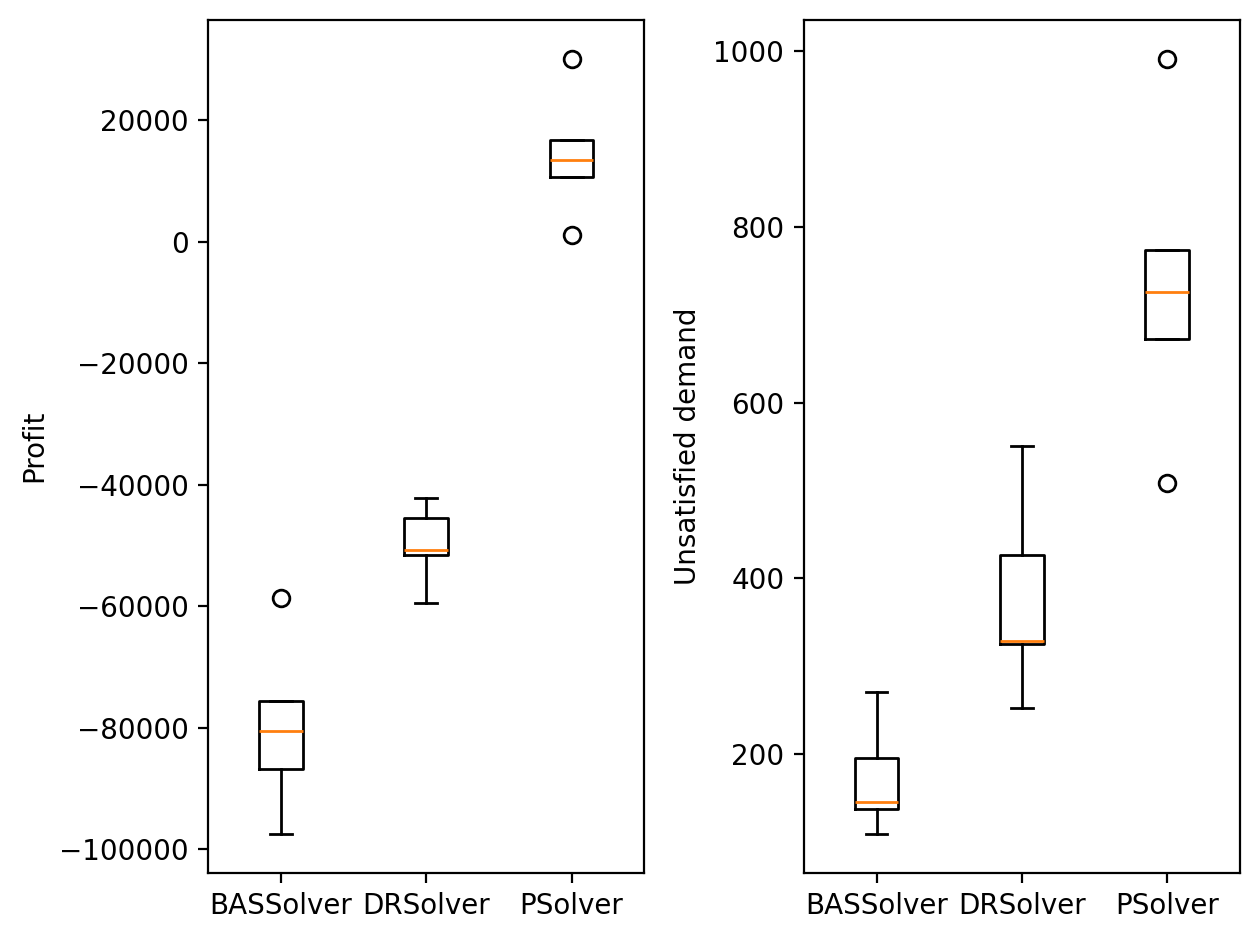

In [27]:
fig = plt.figure(dpi=200)
axl = fig.add_subplot(1, 2, 1)
axr = fig.add_subplot(1, 2, 2)
labels = ["BASSolver", "DRSolver", "PSolver"]
axl.boxplot(
    x=objs,
    tick_labels=labels,
)
axl.set_ylabel("Profit")
axr.boxplot(x=ss, tick_labels=labels)
axr.set_ylabel("Unsatisfied demand")
fig.tight_layout()
fig.show()

In [8]:
np.random.seed(1234)

# Define Facility Location Problem
num_cs = 20
num_fac = 10
dd_sup = np.arange(1, 101)  # Demand support
fac_oc = np.random.uniform(5000, 10000, size=num_fac)  # Opening costs
fac_pos = np.random.uniform(-10, 10, size=(num_fac, 2))  # Facility position
cs_pos = np.random.uniform(-10, 10, size=(num_cs, 2))  # Costumer site position
fac_cap = np.random.uniform(10, 20, size=num_fac)  # Facility capacities
cs_rev = np.repeat(150, num_cs)  # Costumer site revenues
cs_pen = np.repeat(225, num_cs)  # Costumer site penalties
t_factor = np.random.uniform(
    1, 3, size=(num_fac, num_cs)
)  # Transportation factor
dist = lambda x, y: np.linalg.norm(x - y)  # L2 distance
## Compute the distances between facilities and costumer sites
## and compute the transportation costs
t_costs = np.empty_like(t_factor)
for i in range(num_fac):
    for j in range(num_cs):
        t_costs[i, j] = t_factor[i, j] * dist(fac_pos[i], cs_pos[j])

# Define the solver hyparameters
mu_ymean = np.random.uniform(20, 40, size=num_cs)
mu_eps = np.zeros(num_cs)
mu_lbd = np.exp(-t_costs.T / 25)
mu_lbd /= mu_lbd.sum(1)[:, np.newaxis]
sig_ymean = np.array(mu_ymean, copy=True)
sig_lower_eps = np.ones(num_cs)
sig_upper_eps = np.ones(num_cs)
sig_lbd = np.array(mu_lbd, copy=True)

/tmp/ipykernel_24285/4262667738.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


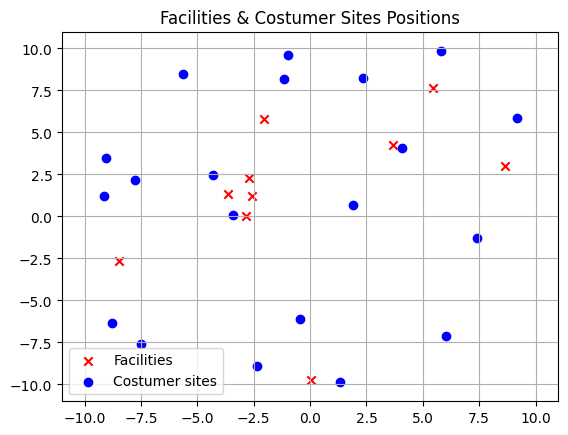

In [9]:
# Plot facility and costumer site positions
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Facilities & Costumer Sites Positions")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)
ax.grid(visible=True)
ax.scatter(
    fac_pos[:, 0], fac_pos[:, 1], c="red", marker="x", label="Facilities"
)
ax.scatter(
    cs_pos[:, 0], cs_pos[:, 1], c="blue", marker="o", label="Costumer sites"
)
ax.legend()
fig.show()

In [11]:
def m_prime(w, eta, z, lower, upper):
    return [
        eta - (1 - z) * upper <= w,
        w <= eta - lower * (1 - z),
        lower * z <= w,
        w <= upper * z,
    ]


def m_2prime(w, eta, z1, z2, lower, upper):
    return [
        w <= upper * z1,
        w <= upper * z2,
        w <= eta - lower * (1 - z1),
        w <= eta - lower * (1 - z2),
        w >= lower * (-1 + z1 + z2),
        w >= eta + upper * (-2 + z1 + z2),
        z1 <= 1,  # Maybe remove 4 lines
        z2 <= 1,
        lower <= eta,
        eta <= upper,
    ]

In [12]:
model = gp.Model("Facility Location Problem")
# Define decision variables
y = model.addMVar(num_fac, vtype=GRB.BINARY, name="Opening variable")
alph = model.addMVar(num_cs)
delt1 = model.addMVar(num_cs)
delt2 = model.addMVar(num_cs)
gam1 = model.addMVar(num_cs)
gam2 = model.addMVar(num_cs)
Delt1 = model.addMVar((num_cs, num_fac))
Delt2 = model.addMVar((num_cs, num_fac))
Gam1 = model.addMVar((num_cs, num_fac))
Gam2 = model.addMVar((num_cs, num_fac))
Psi1 = model.addMVar((num_cs, num_fac, num_fac))
Psi2 = model.addMVar((num_cs, num_fac, num_fac))
Y = model.addMVar((num_fac, num_fac))
Theta = model.addMVar(num_cs)
# Delt1 = delt1[:, np.newaxis] * y[np.newaxis, :]
# Delt2 = delt1[:, np.newaxis] * y[np.newaxis, :]
# Gam1 = gam1[:, np.newaxis] * y[np.newaxis, :]
# Gam2 = gam1[:, np.newaxis] * y[np.newaxis, :]
# Psi1 = gam1[:, np.newaxis, np.newaxis] * y[np.newaxis, :, np.newaxis] * y[np.newaxis, np.newaxis, :]
# Psi2 = gam2[:, np.newaxis, np.newaxis] * y[np.newaxis, :, np.newaxis] * y[np.newaxis, np.newaxis, :]
Lbd = -sig_ymean[:, np.newaxis] * sig_lbd + (mu_ymean * mu_ymean)[
    :, np.newaxis
] * (2 * mu_lbd + mu_lbd * mu_lbd)
delt1_upper = 100000
delt2_upper = 100000
gam1_upper = 100000
gam2_upper = 100000
# Add objective
obj = fac_oc @ y
for j in range(num_cs):
    obj += (
        alph[j]
        + delt1[j] * (mu_ymean[j] + mu_eps[j])
        - delt2[j] * (mu_ymean[j] - mu_eps[j])
    )
    for i in range(num_fac):
        obj += mu_ymean[j] * (mu_lbd[j, i] * (Delt1[j, i] - Delt2[j, i]))
    obj += (sig_ymean[j] + mu_ymean[j] * mu_ymean[j]) * (
        sig_upper_eps[j] * gam1[j] - sig_lower_eps[j] * gam2[j]
    )
    for i in range(num_fac):
        obj += Lbd[j, i] * (
            sig_upper_eps[j] * Gam1[j, i] - sig_lower_eps[j] * Gam2[j, i]
        )
    for l in range(1, num_fac):
        for m in range(l):
            obj += (
                2
                * mu_ymean[j]
                * mu_ymean[j]
                * mu_lbd[j, l]
                * mu_lbd[j, m]
                * (
                    sig_upper_eps[j] * Psi1[j, l, m]
                    - sig_lower_eps[j] * Psi2[j, l, m]
                )
            )
model.setObjective(obj)
# Add contraints relative to the definition of the variables
# for j in range(num_cs):
#     for i in range(num_fac):
#         model.addConstr(Delt1[j, i] == delt1[j] * y[i])
#         model.addConstr(Delt2[j, i] == delt2[j] * y[i])
#         model.addConstr(Gam1[j, i] == gam1[j] * y[i])
#         model.addConstr(Gam2[j, i] == gam2[j] * y[i])
#         model.addConstr(
#             Lbd[j, i]
#             == -sig_ymean[j] * sig_lbd[j, i] + (mu_ymean[j] ** 2) * (2 * mu_lbd[j, i] + mu_lbd[j, i] ** 2)
#         )
#         for m in range(num_fac):
#             model.addConstr(Psi1[j, i, m] == gam1[j] * y[i] * y[m])
#             model.addConstr(Psi2[j, i, m] == gam2[j] * y[i] * y[m])
# Add constraints (17b)
for j in range(num_cs):
    for k in range(dd_sup.shape[0]):
        # i == 0 for the following line
        model.addConstr(
            alph[j]
            + (delt1[j] - delt2[j]) * dd_sup[k]
            + (gam1[j] - gam2[j]) * dd_sup[k] ** 2
            >= (cs_pen[j] - cs_rev[j]) * dd_sup[k]
            + (fac_cap * y * (t_costs[:, j] - cs_pen[j])).sum()
        )
        for i in range(num_fac):
            model.addConstr(
                alph[j]
                + (delt1[j] - delt2[j]) * dd_sup[k]
                + (gam1[j] - gam2[j]) * dd_sup[k] ** 2
                >= (t_costs[i, j] - cs_rev[j]) * dd_sup[k]
                + (fac_cap * y * (t_costs[:, j] - t_costs[i, j])).sum()
            )
# Add McCormick envelopes constaints
for j in range(num_cs):
    for i in range(num_fac):
        model.addConstrs(
            cstr
            for cstr in m_prime(Delt1[j, i], delt1[j], y[i], 0, delt1_upper)
        )
        model.addConstrs(
            cstr
            for cstr in m_prime(Delt2[j, i], delt2[j], y[i], 0, delt2_upper)
        )
        model.addConstrs(
            cstr for cstr in m_prime(Gam1[j, i], gam1[j], y[i], 0, gam1_upper)
        )
        model.addConstrs(
            cstr for cstr in m_prime(Gam2[j, i], gam2[j], y[i], 0, gam2_upper)
        )
        for m in range(num_fac):
            model.addConstrs(
                cstr
                for cstr in m_2prime(
                    Psi1[j, i, m], gam1[j], y[i], y[m], 0, gam1_upper
                )
            )
            model.addConstrs(
                cstr
                for cstr in m_2prime(
                    Psi2[j, i, m], gam2[j], y[i], y[m], 0, gam2_upper
                )
            )
# Add non-negative constaints
model.addConstr(delt1 >= 0)
model.addConstr(delt2 >= 0)
model.addConstr(gam1 >= 0)
model.addConstr(gam2 >= 0)
# Add valid constaints
tmp = 0
for l in range(1, num_fac):
    for m in range(l):
        tmp += mu_lbd[:, l] * mu_lbd[l, m] * Y[l, m]
for j in range(num_cs):
    model.addConstr(
        Theta[j]
        == sig_ymean[j]
        + mu_ymean[j] ** 2
        + (Lbd[j] * y).sum()
        + 2 * mu_ymean[j] ** 2 * tmp[j]
    )
    model.addConstr(
        dd_sup[0] * dd_sup[1]
        - (dd_sup[0] + dd_sup[1])
        * (mu_ymean[j] * (1 + (mu_lbd[j] * y).sum()) - mu_eps[j])
        + Theta[j] * sig_upper_eps[j]
        >= 0
    )
    model.addConstr(
        dd_sup[-2] * dd_sup[-1]
        - (dd_sup[-2] + dd_sup[-1])
        * (mu_ymean[j] * (1 + (mu_lbd[j] * y).sum()) - mu_eps[j])
        + Theta[j] * sig_upper_eps[j]
        >= 0
    )
    model.addConstr(
        -dd_sup[0] * dd_sup[-1]
        + (dd_sup[0] + dd_sup[-1])
        * (mu_ymean[j] * (1 + (mu_lbd[j] * y).sum()) + mu_eps[j])
        - Theta[j] * sig_lower_eps[j]
        >= 0
    )
for l in range(1, num_fac):
    for m in range(l):
        model.addConstrs(cstr for cstr in m_prime(Y[l, m], y[l], y[m], 0, 1))

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


In [13]:
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 65540 rows, 5030 columns and 386220 nonzeros
Model fingerprint: 0xaa9708b6
Variable types: 5020 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [5e-01, 2e+05]
  Objective range  [7e-01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 38566 rows and 2262 columns
Presolve time: 0.90s
Presolved: 26974 rows, 2768 columns, 323129 nonzeros
Variable types: 2758 continuous, 10 integer (10 binary)
Found heuristic solution: objective -80808.06908
Root relaxation presolved: 26974 rows, 2768 columns, 323129 nonzeros


Root relaxation: objective -2.941652e+09, 4014 iterations, 1.50 seconds (4.22 work units)

    Nodes    |    Current Node    |     Objective Bounds

In [14]:
y.x

array([ 1., -0.,  1., -0., -0.,  1., -0., -0.,  1., -0.])

[ True False  True False False  True False False  True False]


/tmp/ipykernel_24285/3352800081.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


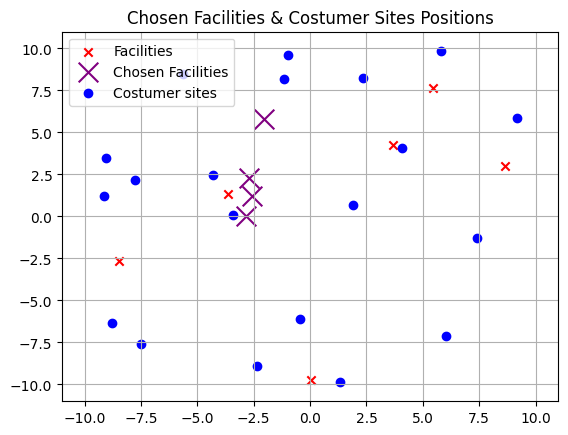

In [15]:
# Optimal solution found (tolerance 1.00e-04)
# Best objective -8.464213966836e+04, best bound -8.464213966836e+04, gap 0.0000%
# array([ 1., -0.,  1., -0., -0.,  1., -0., -0.,  1., -0.])

# Plot chosen facility and costumer site positions
idx = y.x == 1
print(idx)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Chosen Facilities & Costumer Sites Positions")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)
ax.grid(visible=True)
ax.scatter(
    fac_pos[~idx, 0], fac_pos[~idx, 1], c="red", marker="x", label="Facilities"
)
ax.scatter(
    fac_pos[idx, 0],
    fac_pos[idx, 1],
    c="purple",
    marker="x",
    s=200,
    label="Chosen Facilities",
)
ax.scatter(
    cs_pos[:, 0], cs_pos[:, 1], c="blue", marker="o", label="Costumer sites"
)
ax.legend()
fig.show()

In [ ]:
Lbd = -sig_ymean[:, np.newaxis] * sig_lbd + (mu_ymean * mu_ymean)[
    :, np.newaxis
] * (2 * mu_lbd + mu_lbd * mu_lbd)
delt1_upper = 100000
delt2_upper = 100000
gam1_upper = 100000
gam2_upper = 100000

model = gp.Model("Facility Location Problem")
y = model.addMVar(num_fac, vtype=GRB.BINARY, name="Opening variable")
alph = model.addMVar(num_cs)
delt1 = model.addMVar(num_cs)
delt2 = model.addMVar(num_cs)
gam1 = model.addMVar(num_cs)
gam2 = model.addMVar(num_cs)
Delt1 = model.addMVar((num_cs, num_fac))
Delt2 = model.addMVar((num_cs, num_fac))
Gam1 = model.addMVar((num_cs, num_fac))
Gam2 = model.addMVar((num_cs, num_fac))
Psi1 = model.addMVar((num_cs, num_fac, num_fac))
Psi2 = model.addMVar((num_cs, num_fac, num_fac))
Y = model.addMVar((num_fac, num_fac))
Theta = model.addMVar(num_cs)

obj = fac_oc @ y
obj += (alph + delt1 * (mu_ymean + mu_eps) - delt2 * (mu_ymean - mu_eps)).sum()
obj += (mu_ymean[:, np.newaxis] * mu_lbd * (Delt1 - Delt2)).sum()
obj += (
    (sig_ymean + mu_ymean**2) * (sig_upper_eps * gam1 - sig_lower_eps * gam2)
).sum()
obj += (
    Lbd
    * (
        sig_upper_eps[:, np.newaxis] * Gam1
        - sig_lower_eps[:, np.newaxis] * Gam2
    )
).sum()
## Can probably optimize the two loops
for l in range(1, num_fac):
    for m in range(l):
        obj += (
            2
            * mu_ymean[j]
            * mu_ymean[j]
            * mu_lbd[j, l]
            * mu_lbd[j, m]
            * (
                sig_upper_eps[j] * Psi1[j, l, m]
                - sig_lower_eps[j] * Psi2[j, l, m]
            )
        )
model.setObjective(obj)


# Add constraints (17b)
for k in range(dd_sup.shape[0]):
    model.addConstr(
        alph + (delt1 - delt2) * dd_sup[k] + (gam1 - gam2) * dd_sup[k] ** 2
        >= (cs_pen - cs_rev) * dd_sup[k]
        + (fac_cap * y * (t_costs - cs_pen[np.newaxis, :])).sum(0)
    )
for j in range(num_cs):
    for k in range(dd_sup.shape[0]):
        # i == 0 for the following line
        model.addConstr(
            alph[j]
            + (delt1[j] - delt2[j]) * dd_sup[k]
            + (gam1[j] - gam2[j]) * dd_sup[k] ** 2
            >= (cs_pen[j] - cs_rev[j]) * dd_sup[k]
            + (fac_cap * y * (t_costs[:, j] - cs_pen[j])).sum(0)
        )
        for i in range(num_fac):
            model.addConstr(
                alph[j]
                + (delt1[j] - delt2[j]) * dd_sup[k]
                + (gam1[j] - gam2[j]) * dd_sup[k] ** 2
                >= (t_costs[i, j] - cs_rev[j]) * dd_sup[k]
                + (fac_cap * y * (t_costs[:, j] - t_costs[i, j])).sum()
            )